<center> 
    
# ⚔Fast.ai中的尝试
    
<br>
<br>

</center>

<div class="alert alert-block alert-success">  
 <b>Fast.ai Version:</b> v2.0.17  <b>Draft Date:</b> 2020-06-09   
<br>
   
<br> 
<br>
    
记录`fast.ai` 使用中的一些尝试 ...
</div>


In [2]:
from fastai.vision.all import *

## 标记

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

蓝色给大家一些新的提示要点，可以进行拓展操作.
    
<br>
<b>经验分享👣</b>

分享一些经验，踩过的坑. 
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

这部分会对学过的知识进行关联和回顾，便于大家进行巩固.  
</div>

<div class="alert alert-block alert-success">  
概要✅：

绿色部分为章节内容核心点，提醒关注.
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
红色标识了重点注意事项，提醒大家注意.   
</div>

<details><summary>🤔--这是被隐藏的内容，思考之后再打开👇</summary>
<center>
>
>
打开之后你将看到内容的详情 ...
>
>
</center>
</details>

## 自定义Transforms

In [ ]:
def centerSizeCrop(image, crop_size):
    rows, cols = image.shape[:2]
    x = round((cols - crop_size) / 2.0)
    y = round((rows - crop_size) / 2.0)
    img = image[y:y+crop_size, x:x+crop_size]
    return img

In [2]:
def fixsizeCrop(img, size,crop):
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, size)
    img = centerSizeCrop(img, crop)
    return Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

In [3]:
class SizeTfm(Transform):
    def __init__(self,size,crop):
        if isinstance(size,int): size=(size,size)
        self.size = size
        self.crop = crop
    def encodes(self, img: Image.Image):
        return fixsizeCrop(img, self.size,self.crop)

In [147]:
path = untar_data(URLs.PETS)
files = get_image_files(path/'images')

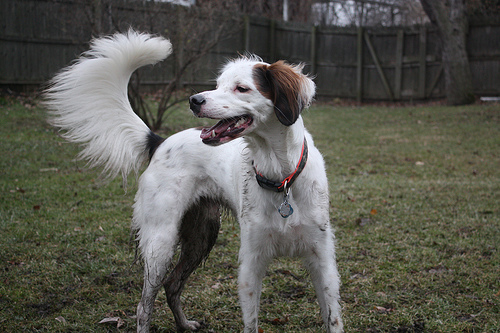

In [154]:
img = PILImage.create(files[0])
img

In [152]:
img.size

(500, 333)

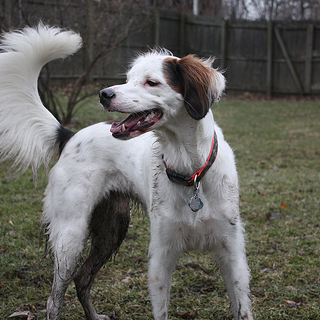

In [157]:
SizeTfm((500,333),320)(img)

## 如何获取validation sets的一个批数据

In [10]:
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

In [12]:
def label_func(f): return f[0].isupper()

In [13]:
data = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

In [15]:
with data.valid.fake_l.no_multiproc():
    out = next(iter(data.valid))

In [18]:
out[0].shape, out[1].shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))